#**DEMO 3:Recommending Similar Movie to the User**

###**Problem Definition**

Sarah a friend of yours just watched a movie called **Return of the Jedi**. Predict movies similar to Return of Jedi using a Recommender System written in Python.
  

###**Dataset Description**

**Recommend.csv**

This dataset contains 4 attributes:

> **1. user_id**: Represents ID of the User.

> **2. item_id**: Represents ID of the Movie.

> **3. rating**: Represents rating of the movie made on a 5 star scale.

> **4. timestamp**: Represents seconds since midnight UTC of January 1,1970.


**Movie_Id_titles**

This dataset contains 2 attributes:

> **1. item_id**: Represents ID of the User.

> **2. title**: Represents the title of the Movie.




###**Tasks to be performed**


>* Importing Required Libraries
>* Loading the Dataset
>* Analyzing and Preparing the dataset
>* Understanding Recommender System
>* Implementing Recommender System in Python


**Importing Required Libraries**

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

**Loading the dataset**


In [ ]:
!wget https://www.dropbox.com/s/hco42cl7lwijjfg/Recommend.csv

In [ ]:
column_names = ['User_ID', 'Movie_ID', 'Ratings', 'Timestamp'] 
df = pd.read_csv('Recommend.csv',names= column_names) 
df.head() 

User_ID  Movie_ID  Ratings  Timestamp
0      196       242        3  881250949
1      186       302        3  891717742
2       22       377        1  878887116
3      244        51        2  880606923
4      166       346        1  886397596

In [ ]:
!wget https://www.dropbox.com/s/djvmtegw4mdrsj3/Movie_Id_Titles.csv

In [ ]:
# Check out all the movies and their respective IDs 
df1 = pd.read_csv('Movie_Id_Titles.csv') 
df1.columns=['Movie_ID','Title']
df1.head() 

Movie_ID              Title
0         1   Toy Story (1995)
1         2   GoldenEye (1995)
2         3  Four Rooms (1995)
3         4  Get Shorty (1995)
4         5     Copycat (1995)

**Analyzing and Preparing the dataset**

In [ ]:
# Merging both the dataset
df2 = pd.merge(df, df1, on='Movie_ID') 
df2.head()

User_ID  Movie_ID  Ratings  Timestamp         Title
0      196       242        3  881250949  Kolya (1996)
1       63       242        3  875747190  Kolya (1996)
2      226       242        5  883888671  Kolya (1996)
3      154       242        3  879138235  Kolya (1996)
4      306       242        5  876503793  Kolya (1996)

In [ ]:
df2.shape

(100000, 5)

In [ ]:
df2.describe()

User_ID       Movie_ID        Ratings     Timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08

In [ ]:
#Checking for Null Values
df2.isnull().sum()

User_ID      0
Movie_ID     0
Ratings      0
Timestamp    0
Title        0
dtype: int64

In [ ]:
df2.nunique()

User_ID        943
Movie_ID      1682
Ratings          5
Timestamp    49282
Title         1664
dtype: int64

**Understanding Recommender System in Python**

A Recommender System is a simple algorithm which predicts what a user may or may not like among a given list of items. The algorithm rates the items and presents the user the items that they would like. An example of a recommendation system in action is when you vist Netflix, it recommends movies to you. The kind of recommendation system that they use is very complex. We are going to implement a very simple recommender system in Python by just using Pandas.

**Implementing Recommender System in Python**

In [ ]:
# Count the ratings of all movies 
df2.groupby('Title')['Ratings'].count().sort_values(ascending=False).head() 

Title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: Ratings, dtype: int64

In [ ]:
# Count the ratings of all movies 
df2.groupby('Title')['Ratings'].count().sort_values(ascending=True).head() 

Title
Á köldum klaka (Cold Fever) (1994)            1
Mille bolle blu (1993)                        1
Mat' i syn (1997)                             1
Marlene Dietrich: Shadow and Light (1996)     1
Man from Down Under, The (1943)               1
Name: Ratings, dtype: int64

In [ ]:
#Creating a dataframe with mean 'rating' and total number of ratings for each movie 
ratings = pd.DataFrame(df2.groupby('Title')['Ratings'].mean())  
ratings['Number of Ratings'] = pd.DataFrame(df2.groupby('Title')['Ratings'].count())   
ratings.head() 

Ratings  Number of Ratings
Title                                                 
'Til There Was You (1997)  2.333333                  9
1-900 (1994)               2.600000                  5
101 Dalmatians (1996)      2.908257                109
12 Angry Men (1957)        4.344000                125
187 (1997)                 3.024390                 41

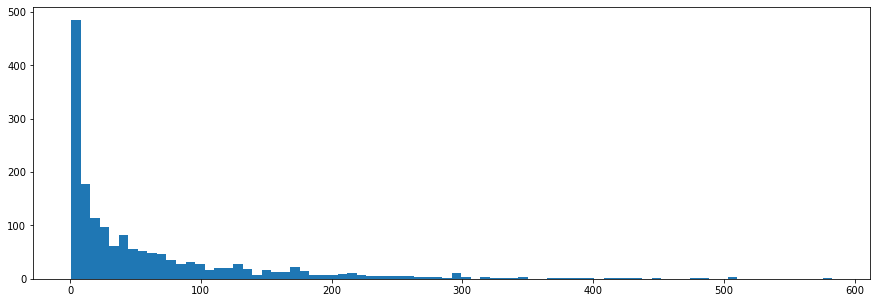

In [ ]:
#Visualizing the Number of Ratings column
plt.figure(figsize=(15,5))
plt.hist(ratings['Number of Ratings'],bins=80)
plt.show()

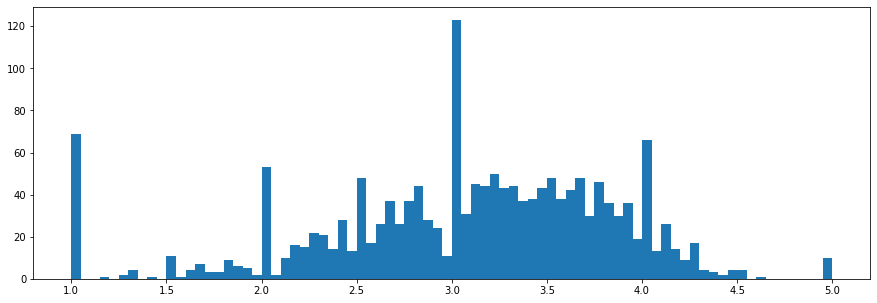

In [ ]:
#Visualizing the Ratings
plt.figure(figsize=(15,5))
plt.hist(ratings['Ratings'],bins=80)
plt.show()

In [ ]:
df2.head()

User_ID  Movie_ID  Ratings  Timestamp         Title
0      196       242        3  881250949  Kolya (1996)
1       63       242        3  875747190  Kolya (1996)
2      226       242        5  883888671  Kolya (1996)
3      154       242        3  879138235  Kolya (1996)
4      306       242        5  876503793  Kolya (1996)

In [ ]:
# Sorting values according to the 'num of rating column' 
pivot_movie = df2.pivot_table(index ='User_ID',columns ='Title', values ='Ratings') 
pivot_movie.head()

Title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
User_ID                                                                   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
5                              NaN           NaN                    2.0   

Title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
User_ID                                                                 
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   
5                        NaN         NaN                          NaN   

Title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
User_ID                                                                      
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   
5                                        NaN                           4.0   

Title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
User_ID                                                                      
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   
5                                                NaN                   NaN   

Title    ...  Yankee Zulu (1994)  Year of the Horse (1997)  \
User_ID  ...                                                 
1        ...                 NaN                       NaN   
2        ...                 NaN                       NaN   
3        ...                 NaN                       NaN   
4        ...                 NaN                       NaN   
5        ...                 NaN                       NaN   

Title    You So Crazy (1994)  Young Frankenstein (1974)  Young Guns (1988)  \
User_ID                                                                      
1                        NaN                        5.0                3.0   
2                        NaN                        NaN                NaN   
3                        NaN                        NaN                NaN   
4                        NaN                        NaN                NaN   
5                        NaN                        4.0                NaN   

Title    Young Guns II (1990)  Young Poisoner's Handbook, The (1995)  \
User_ID                                                                
1                         NaN                                    NaN   
2                         NaN                                    NaN   
3                         NaN                                    NaN   
4                         NaN                                    NaN   
5                         NaN                                    NaN   

Title    Zeus and Roxanne (1997)  unknown  Á köldum klaka (Cold Fever) (1994)  
User_ID                                                                        
1                            NaN      4.0                                 NaN  
2                            NaN      NaN                                 NaN  
3                            NaN      NaN                    

In [ ]:
ratings.sort_values('Number of Ratings', ascending = False).head(5) 

Ratings  Number of Ratings
Title                                                 
Star Wars (1977)           4.358491                583
Contact (1997)             3.803536                509
Fargo (1996)               4.155512                508
Return of the Jedi (1983)  4.007890                507
Liar Liar (1997)           3.156701                485

In [ ]:
pivot_movie['Return of the Jedi (1983)'] 

User_ID
1      5.0
2      NaN
3      4.0
4      NaN
5      5.0
      ... 
939    NaN
940    3.0
941    5.0
942    NaN
943    4.0
Name: Return of the Jedi (1983), Length: 943, dtype: float64

In [ ]:
# analysing correlation with similar movies 
jedi_user_ratings = pivot_movie['Return of the Jedi (1983)'] 
fargo_user_ratings = pivot_movie['Fargo (1996)'] 
jedi_user_ratings.head() 

User_ID
1    5.0
2    NaN
3    4.0
4    NaN
5    5.0
Name: Return of the Jedi (1983), dtype: float64

##### Cosine Similarity :

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

##### Pearson Correlation

In [ ]:
# Analysing Correlation with Similar Movies 
similar_to_return_of_jedi = pivot_movie.corrwith(jedi_user_ratings)#'corrwith' computes pairwise correlation between rows and columns of two dataframes
similar_to_fargo = pivot_movie.corrwith(fargo_user_ratings) 
similar_to_return_of_jedi.head()

Title
'Til There Was You (1997)    1.000000
1-900 (1994)                -0.828079
101 Dalmatians (1996)        0.165659
12 Angry Men (1957)         -0.026169
187 (1997)                   0.064155
dtype: float64

In [ ]:
corr_return_of_jedi = pd.DataFrame(similar_to_return_of_jedi, columns =['Correlation']) 
corr_return_of_jedi.dropna(inplace = True) 
corr_return_of_jedi.head() 

Correlation
Title                                 
'Til There Was You (1997)     1.000000
1-900 (1994)                 -0.828079
101 Dalmatians (1996)         0.165659
12 Angry Men (1957)          -0.026169
187 (1997)                    0.064155

In [ ]:
corr_return_of_jedi = corr_return_of_jedi.join(ratings['Number of Ratings']) 
corr_return_of_jedi.head() 

Correlation  Number of Ratings
Title                                                    
'Til There Was You (1997)     1.000000                  9
1-900 (1994)                 -0.828079                  5
101 Dalmatians (1996)         0.165659                109
12 Angry Men (1957)          -0.026169                125
187 (1997)                    0.064155                 41

In [ ]:
# Similar movies like Return of Jedi
corr_return_of_jedi[corr_return_of_jedi['Number of Ratings']>200].sort_values('Correlation', ascending = False).head(10)

Correlation  Number of Ratings
Title                                                                    
Return of the Jedi (1983)                     1.000000                507
Empire Strikes Back, The (1980)               0.721229                367
Star Wars (1977)                              0.672556                583
Raiders of the Lost Ark (1981)                0.467391                420
Indiana Jones and the Last Crusade (1989)     0.422294                331
Back to the Future (1985)                     0.411901                350
True Lies (1994)                              0.364536                208
Braveheart (1995)                             0.350180                297
Men in Black (1997)                           0.313007                303
Field of Dreams (1989)                        0.300293                212

**From above, you can see top 10 movies similar to the movie 'Return of the Jedi' that can be recommended to the user.**

In [ ]:
# Similar movies as of Fargo
corr_fargo = pd.DataFrame(similar_to_fargo, columns =['Correlation']) 
corr_fargo.dropna(inplace = True) 
corr_fargo = corr_fargo.join(ratings['Number of Ratings']) 
corr_fargo.head()

Correlation  Number of Ratings
Title                                                    
'Til There Was You (1997)     0.100000                  9
1-900 (1994)                  0.866025                  5
101 Dalmatians (1996)        -0.245368                109
12 Angry Men (1957)           0.098676                125
187 (1997)                    0.142509                 41

In [ ]:
corr_fargo[corr_fargo['Number of Ratings']>200].sort_values('Correlation', ascending = False).head(10)

Correlation  Number of Ratings
Title                                                                 
Fargo (1996)                               1.000000                508
People vs. Larry Flynt, The (1996)         0.341784                215
Stand by Me (1986)                         0.332730                227
Amadeus (1984)                             0.308669                276
2001: A Space Odyssey (1968)               0.299882                259
Graduate, The (1967)                       0.295198                239
Raising Arizona (1987)                     0.293711                256
Clockwork Orange, A (1971)                 0.279690                221
One Flew Over the Cuckoo's Nest (1975)     0.259840                264
M*A*S*H (1970)                             0.254092                206

**From above, you can see top 10 movies similar to the movie 'Fargo' that can be recommended to the user.**

In [ ]:
# Note:
For user based, we use the Movie Names as columns